# Calculate metrics for Casanovo runs
## Setup ground truth validation data

In [5]:
import os

from scripts.plot import plot_metrics

val_mgf_file = "/mnt/data/cdens/casanovo-scaling/massivekb_data/massiveKB_3cac0386/subsets/val.mgf"
val_cache_dir = "/mnt/data/cdens/casanovo-scaling/massivekb_data/massiveKB_3cac0386/val_metrics_cache/"
os.makedirs(val_cache_dir, exist_ok=True)

In [6]:
from massivekb_data.analysis import create_sequence_index

val_true_df = create_sequence_index(val_mgf_file, val_cache_dir, total=int(66e6))
val_true_df = val_true_df.rename({"sequence": "sequence_true"}, axis=1)

## Calculate experiment metrics

In [7]:
%load_ext autoreload
%autoreload 2

from evaluate import evaluate_experiment

eval_dir = "/mnt/data/cdens/casanovo-scaling/logs/bs_lr_S/"
cache_dir = "/mnt/data/cdens/casanovo-scaling/logs/bs_lr_S_cache/"

metrics = evaluate_experiment(eval_dir, val_true_df, cache_dir)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
USING CACHED: global_train_batch_size@1024+learning_rate@0.0001+max_steps@187500+val_check_interval@9375
CALCULATING: global_train_batch_size@1024+learning_rate@0.00017782794100389227+max_steps@187500+val_check_interval@9375
No mztab file found for run global_train_batch_size@1024+learning_rate@0.00017782794100389227+max_steps@187500+val_check_interval@9375
USING CACHED: global_train_batch_size@1024+learning_rate@0.00031622776601683794+max_steps@187500+val_check_interval@9375
CALCULATING: global_train_batch_size@1024+learning_rate@0.0005623413251903491+max_steps@187500+val_check_interval@9375
No mztab file found for run global_train_batch_size@1024+learning_rate@0.0005623413251903491+max_steps@187500+val_check_interval@9375
USING CACHED: global_train_batch_size@1024+learning_rate@0.001+max_steps@187500+val_check_interval@9375
CALCULATING: global_train_batch_size@1024+learning_rate@0.0017782794100389

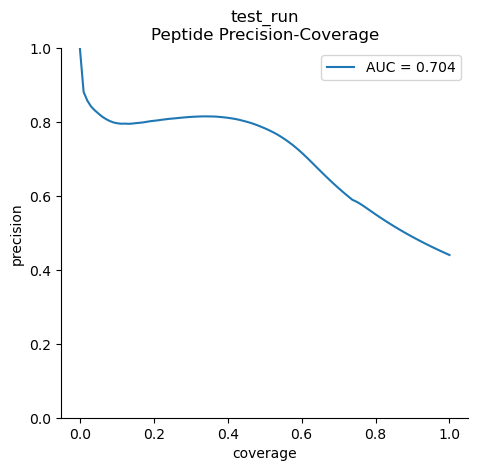

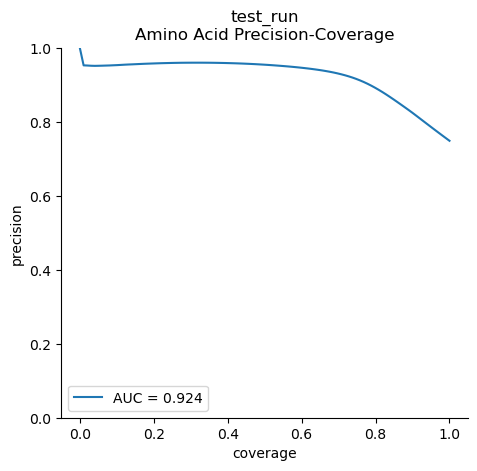

(0.7044298619081207, 0.9239345235026079)

<Figure size 640x480 with 0 Axes>

In [10]:
test_run = 'global_train_batch_size@1024+learning_rate@0.0001+max_steps@187500+val_check_interval@9375'

plot_metrics(metrics[test_run], "test_run", "test_run", show=True)

In [ ]:
## Plot Precision vs Validation Loss
# Verify that the model loss is a good proxy for actual precision

from scripts.plot import plot_precision_vs_loss

losses, pep_prec, aa_prec = plot_precision_vs_loss(
    metrics,
    eval_dir,
    save_file="precision_vs_loss",
    show=True
)